# Classification Eyes Iris

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data Reading

In [2]:
df = pd.read_csv('data_iris.csv')
df.head()

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### iniasialisasi Target to binary

In [ ]:
# mapping into binary class
target_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1
}

df['target_binary'] = df['target'].map(target_mapping)
df

,x1,x2,x3,x4,target,target_binary
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,5.1,2.5,3.0,1.1,Iris-versicolor,1


### Data Splitting

In [4]:
y = df["target_binary"]
X = df[["x1","x2","x3","x4"]]

#### Pembagian Data Train dan Validasi
dibagi menjadi 80% untuk Training dan 20% untuk training

In [ ]:
#  baris untuk pelatihan
X0train = X.loc[0:39]
X1train = X.loc[50:89]

y0train = y.loc[0:39]
y1train = y.loc[50:89]

X0val = X.loc[40:49]
X1val = X.loc[90:99]

y0val = y.loc[40:49]
y1val = y.loc[90:99]

# Ambil 80 pertama untuk data latih
X_train = pd.concat([X0train,X1train]).values
y_train = pd.concat([y0train,y1train]).values

X_val = pd.concat([X0val,X1val]).values
y_val = pd.concat([y0val,y1val]).values

# Verifikasi ukurannya
print(f"Jumlah baris X_train: {len(X_train)}")  # Output: 80
print(f"Jumlah baris X_val: {len(X_val)}")    # Output: 20
print(f"Jumlah baris y_train: {len(y_train)}")  # Output: 80
print(f"Jumlah baris y_val: {len(y_val)}")    # Output: 20

Jumlah baris X_train: 80
Jumlah baris X_val: 20
Jumlah baris y_train: 80
Jumlah baris y_val: 20


## Inisialisasi Fungsi

In [6]:
def initialize_weights():
    weight = np.array([0.5, 0.5, 0.5, 0.5])
    bias = 0.5
    return weight, bias
def calculate_z(X, weight, bias):
    return np.dot(X, weight) + bias
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def update_weights(weight, bias, X, y_true, y_pred, lr):
    common_derivative = 2 * (y_pred - y_true) * y_pred * (1 - y_pred)
    
    dw = X * common_derivative
    db = common_derivative
    
    weight = weight - lr * dw
    bias = bias - lr * db
    
    return weight, bias

## Function Single Perceptron

In [9]:
def Spl(X_train, Y_train, X_val, Y_val, learningRate=0.1, epoch=5):
    w, b = initialize_weights()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    print("--- Training ---")
    for e in range(epoch):
        correct_preds = 0
        train_loss = 0
        for i in range(len(X_train)):
            z_i = calculate_z(X_train[i], w, b)
            y_pred_i = sigmoid(z_i)
            preds = (y_pred_i >= 0.5).astype(int)
            if preds == Y_train[i]:
                correct_preds += 1
            E = y_pred_i - Y_train[i]
            train_loss += E ** 2
            w, b = update_weights(w, b, X_train[i], Y_train[i], y_pred_i, learningRate)    

        train_acc = (correct_preds / len(X_train)) * 100
        train_losses.append(train_loss / len(X_train))
        train_accuracies.append(train_acc)
            
        val_preds = 0
        val_loss = 0
        for i in range(len(X_val)):
            z_i = calculate_z(X_val[i], w, b)
            y_pred_i = sigmoid(z_i)
            pred = (y_pred_i >= 0.5).astype(int)
            if pred == Y_val[i]:
                val_preds += 1
            E = y_pred_i - Y_val[i]
            val_loss += E**2

        val_acc = (val_preds / len(X_val)) * 100
        val_losses.append(val_loss / len(X_val))
        val_accuracies.append(val_acc)

        print(f"Epoch {e+1}/{epoch} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    print("~~~~~ Selesi ~~~~~")

    epoch_range = range(1, epoch + 1)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, train_losses, marker='o', linestyle='-', label="Train Loss")
    plt.plot(epoch_range, val_losses, marker='s', linestyle='--', label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("SSE Loss")
    plt.title("Loss over Epochs")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, train_accuracies, marker='o', linestyle='-', label="Train Accuracy")
    plt.plot(epoch_range, val_accuracies, marker='s', linestyle='--', label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy over Epochs")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    return w, b, train_losses, val_losses, train_accuracies, val_accuracies

--- Training ---
Epoch 1/5 | Train Loss: 35.9911, Train Acc: 52.50% | Val Loss: 6.5790, Val Acc: 50.00%
Epoch 2/5 | Train Loss: 2.9962, Train Acc: 95.00% | Val Loss: 4.9458, Val Acc: 50.00%
Epoch 3/5 | Train Loss: 1.9498, Train Acc: 97.50% | Val Loss: 3.5178, Val Acc: 50.00%
Epoch 4/5 | Train Loss: 1.3886, Train Acc: 97.50% | Val Loss: 2.3876, Val Acc: 85.00%
Epoch 5/5 | Train Loss: 1.0192, Train Acc: 98.75% | Val Loss: 1.6316, Val Acc: 100.00%
~~~~~ Selesi ~~~~~


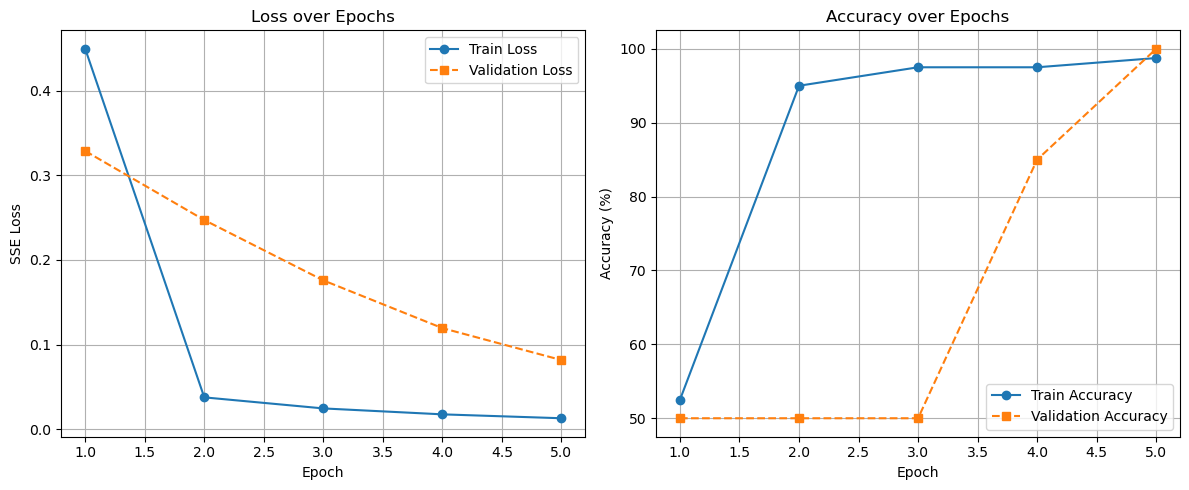

(array([-0.24180165, -0.41690349,  1.1222139 ,  0.82405866]),
 0.2577197481284966,
 [0.4498886551395292,
  0.03745191422809949,
  0.02437219499639377,
  0.017357201678426595,
  0.012740158208926562],
 [0.3289511565546991,
  0.24728932330356232,
  0.1758916406671348,
  0.11938137329297323,
  0.08158136941106595],
 [52.5, 95.0, 97.5, 97.5, 98.75],
 [50.0, 50.0, 50.0, 85.0, 100.0])

In [10]:
Spl(X_train, y_train, X_val, y_val, learningRate=0.1, epoch=5)